# Istogramma

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, probplot, norm, uniform, expon

#### Esempio 1 
Mezzi di trasporto urbani

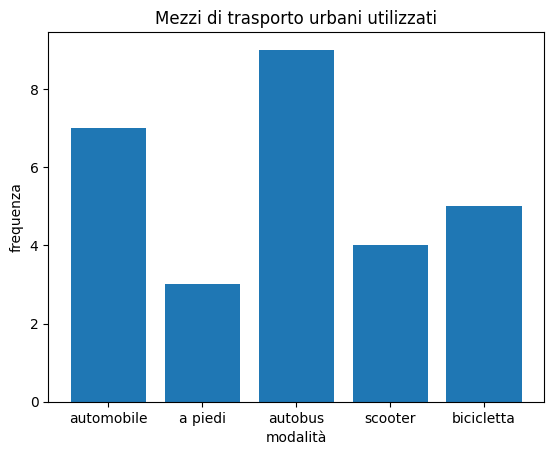

In [33]:
mod = ['automobile', 'a piedi', 'autobus', 'scooter', 'bicicletta']  # modalità
freq = np.array([7, 3, 9, 4, 5]) # frequenze

plt.bar(mod, freq)
plt.title('Mezzi di trasporto urbani utilizzati')
#plt.xticks(rotation=90)
plt.xlabel('modalità')
plt.ylabel('frequenza')
plt.show()

#### Esempio 2 
Indagine sul peso di 100 studenti

Pesi medi: [61. 64. 67. 70. 73.]



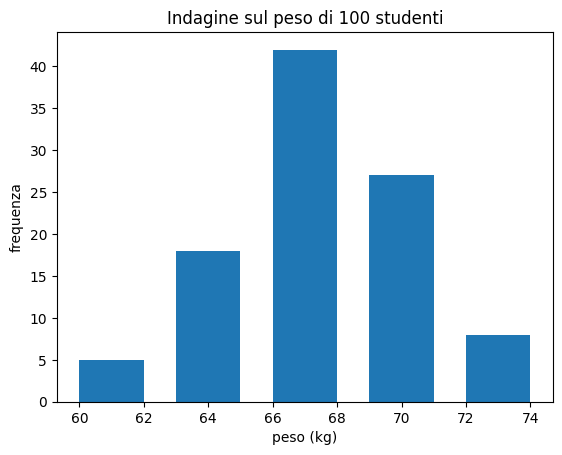

In [34]:
pesi = np.array([[60, 62], [63, 65], [66, 68], [69, 71], [72, 74]])
freq = np.array([5, 18, 42, 27, 8])

ampiezza = pesi[:, 1] - pesi[:, 0] # seconda colonna - prima colonna
pesi_medi = np.mean(pesi, 1) # oppure (pesi[:, 0] + pesi[:, 1])/2
print(f'Pesi medi: {pesi_medi}\n')

plt.bar(pesi_medi, freq, width=ampiezza)
plt.title('Indagine sul peso di 100 studenti')
plt.xlabel('peso (kg)')
plt.ylabel('frequenza')
plt.show()

#### Esempio 3
Un monitoraggio sulla densità di polveri sottili nell'aria ha condotto alle frequenze riportate sotto.
- Si calcolino i quartili empirici

Valori medi: [0.25 0.75 1.25 1.75]



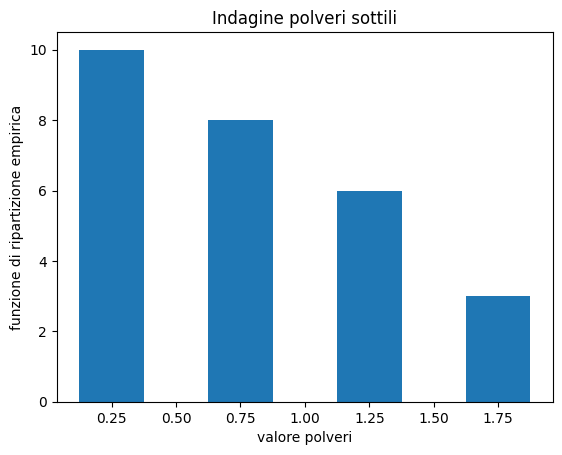

In [42]:
classi = np.array([[0, 0.5], [0.5, 1], [1, 1.5], [1.5, 2]])
freq = np.array([10, 8, 6, 3])

ampiezza = classi[:,1] - classi[:,0]
val_medi = np.mean(classi, 1)
print(f'Valori medi: {val_medi}\n')

plt.bar(val_medi, freq, width=ampiezza/2)
plt.title('Indagine polveri sottili')
plt.xlabel('valore polveri')
plt.ylabel('funzione di ripartizione empirica')
plt.show() 

Frequenze relative: [0.37037037 0.2962963  0.22222222 0.11111111]

Frequenze cumulate: [0.         0.37037037 0.66666667 0.88888889 1.        ]

Confini: [0.  0.5 1.  1.5 2. ]

Quartili empirici: [0.3375  0.71875 1.1875 ]



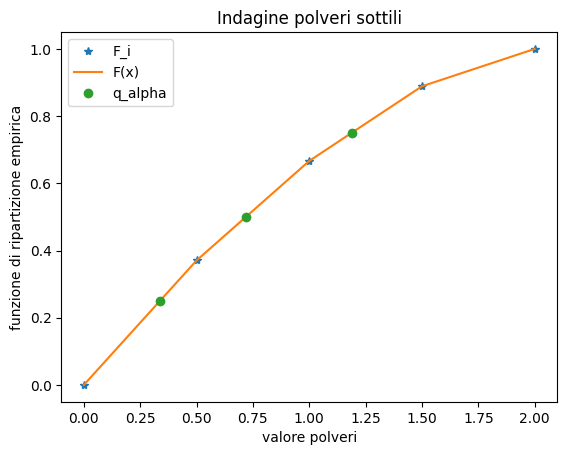

In [36]:
n = sum(freq)
f_relative = freq/n # probabilità relative dei valori
print(f'Frequenze relative: {f_relative}\n')

f_cumulate = np.cumsum(f_relative) # frequenze cumulate
f_cumulate = np.insert(f_cumulate, 0, 0) # estendo a 5 elementi aggiungendo 0 in prima posizione
print(f'Frequenze cumulate: {f_cumulate}\n')

confini = classi[:,0]
confini = np.insert(confini, 4, 2)
print(f'Confini: {confini}\n')

alpha = np.array([0.25, 0.5, 0.75]) # quartili desiderati
q_alpha = np.interp(alpha, f_cumulate, confini) # ricavo per interpolazione i valori empirici dei quartili
print(f'Quartili empirici: {q_alpha}\n')

plt.plot(confini, f_cumulate, '*', label='F_i')
plt.plot(confini, f_cumulate, '-', label='F(x)')
plt.plot(q_alpha, alpha, 'o', label='q_alpha')

plt.title("Indagine polveri sottili")
plt.legend(loc='upper left')
plt.xlabel('valore polveri')
plt.ylabel('funzione di ripartizione empirica')

plt.show()

#### Esempio 4
L'altezza di 2000 individui di una popolazione è riportata nel file 'Data_altezze.dat'. 
- Calcolare la media e deviazione standard della popolazione
- Costruire un' istogramma a 20 barre
- È possibile adattare ai dati di una distribuzione normale ?

Media: 169.88389694
Deviazione standard: 9.577702521955114
Coefficiente di skewness: 0.008 --> vicino a 0
Coefficiente di kurtosi: 2.885 --> vicino a 3


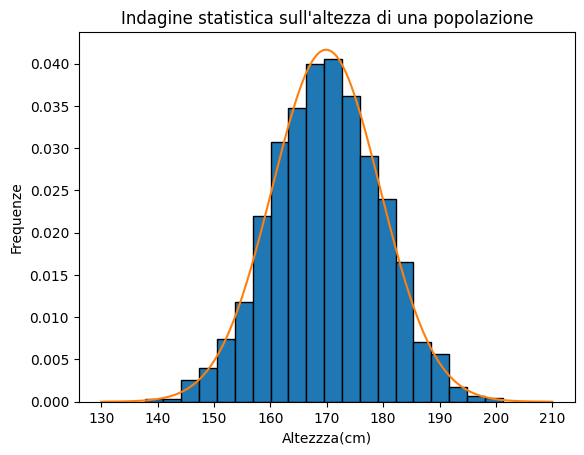

In [45]:
data = np.loadtxt('Data_altezze.dat')

media = np.mean(data)
print(f'Media: {media}')
dev_std = np.std(data)
print(f'Deviazione standard: {dev_std}')

plt.hist(data, density=True, bins=20, edgecolor='black')
plt.title('Indagine statistica sull\'altezza di una popolazione')
plt.xlabel('Altezzza(cm)')
plt.ylabel('Frequenze')

# Se beta1 = 0(skewness) e beta2 =  3(kurtosi) si può approssimare ad una normale
beta1 = skew(data)
beta2 = kurtosis(data, fisher=False)
print(f'Coefficiente di skewness: {beta1:.3f} --> vicino a 0\nCoefficiente di kurtosi: {beta2:.3f} --> vicino a 3')

x = np.linspace(130, 210, 200)
y = norm.pdf(x, media, dev_std)
plt.plot(x, y)

plt.show()

#### Esempio 5
Mezzi di trasporto utilizzati

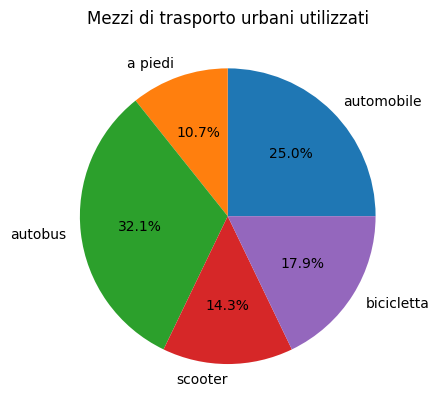

In [38]:
mod = ['automobile', 'a piedi', 'autobus', 'scooter', 'bicicletta']  # modalità
freq = np.array([7, 3, 9, 4, 5]) # frequenze

plt.pie(freq, labels=mod, autopct='%1.1f%%')
plt.title('Mezzi di trasporto urbani utilizzati')
plt.show()

#### Esempio 6
L'altezza di 2000 individui di una popolazione è riportata nel file 'Data_altezze.dat'. 
- Costruiamo il box-plot e rappresentiamo gli outliers con dei cerchietti

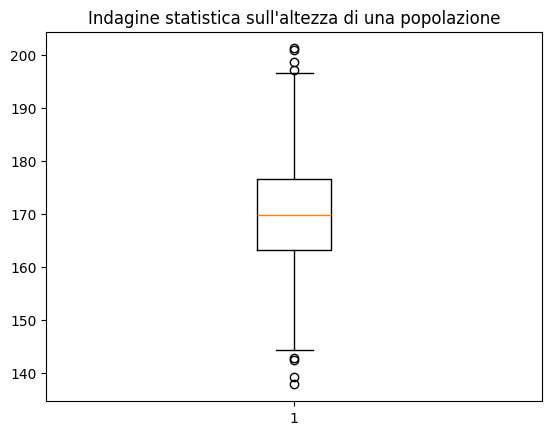

In [39]:
plt.boxplot(data)
plt.title('Indagine statistica sull\'altezza di una popolazione')
plt.show()

### Grafico di probabilità normale (caso particolare del QQ-plot)
Le figure mostrano i grafici di probabilità normale per tre differenti dataset. Dal grafico a sinistra e centrale si evince che i dati non seguono una distribuzione normale, nel grafico a destra si osserva invece un buon adattamento dei dati con la loro distribuzione normale

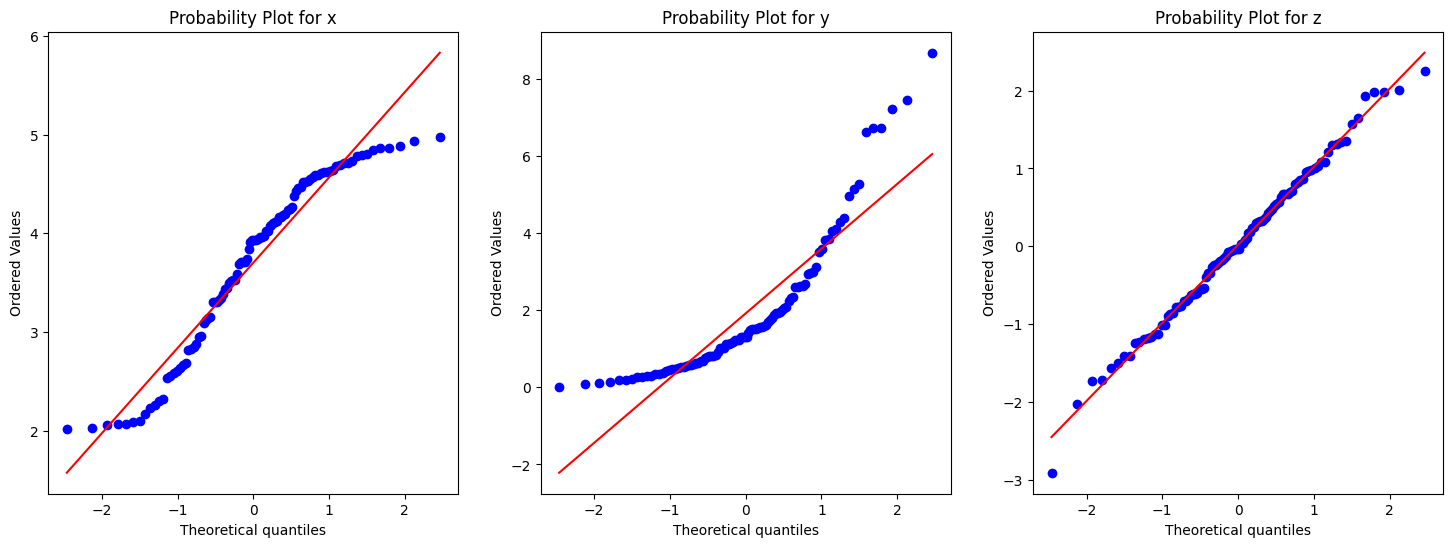

In [46]:
data = np.loadtxt('DATA_prob_plot.dat')

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Grafico del probability plot per x
probplot(x, dist=norm, plot=ax1)
ax1.set_title('Probability Plot for x')

# Grafico del probability plot per y
probplot(y, dist=norm, plot=ax2)
ax2.set_title('Probability Plot for y')

# Grafico del probability plot per z
probplot(z, dist=norm, plot=ax3)
ax3.set_title('Probability Plot for z')

plt.show()

#### Quantile-quantile plot (QQ-plot)
Più in generale si parla dii grafico quantile-quantile. Esso è una tecnica grafica per stabilire se un insieme di dati segue approssimativamente una data distribuzione o meno. Si esegue confrontando i quantili empirici, calcolati a partire dal dataset, con quelli teorici della distribuzione di cui si vuole verificare l'adattamento.

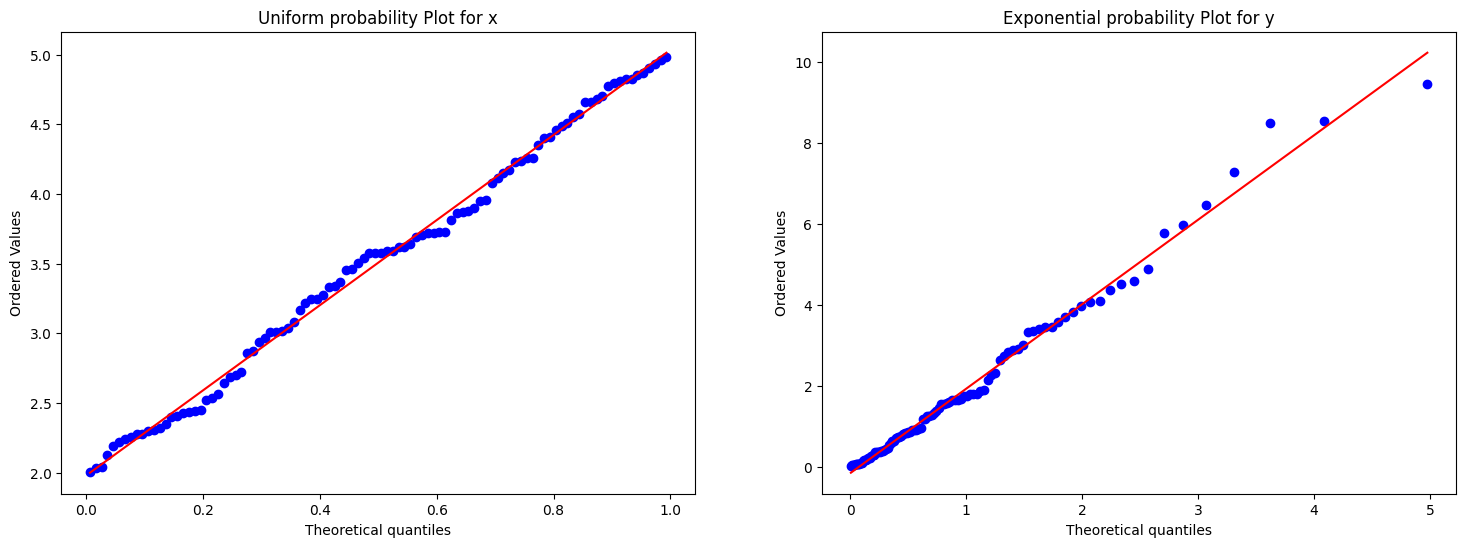

In [50]:
x = np.random.uniform(2, 5, 100)
y = np.random.exponential(2, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Grafico del probability plot per x
probplot(x, dist=uniform, plot=ax1)
ax1.set_title('Uniform probability Plot for x')

# Grafico del probability plot per y
probplot(y, dist=expon, plot=ax2)
ax2.set_title('Exponential probability Plot for y')

plt.show()

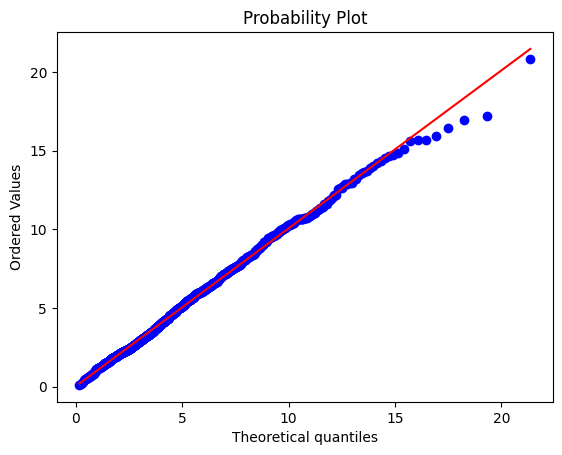

In [54]:
from scipy.stats import chi2
df = 5
h = np.random.chisquare(df, 1000)

fig, ax = plt.subplots(1, 1)
ax.set_title("Chi2")
probplot(h, dist=chi2(df), plot=ax)  # Passa df come argomento per la distribuzione chi-quadro
plt.show()